<a href="https://colab.research.google.com/github/asqarqyzy/Insurance/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libs and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score, KFold, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/train20240605/train.csv", index_col=0)

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/test20240605/test.csv", index_col=0)

# Data structure

In [ ]:
df_train.head()

,ID_NEW,с_date,Score_p,Score_bm,Score_ae,Score_vy,Score_vt,Score_r,Score_bcb,Score_ow,...,SCORE_6_8,SCORE_6_9,SCORE_7_4,SCORE_7_5,SCORE_7_6,SCORE_7_7,SCORE_7_8,SCORE_7_9,SCORE_9_25,SCORE_11_15
1651,1652,2021-04-13,16651,6.0,2,1993,4,7,1,1.110100e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,1749,2021-04-08,16551,2.0,2,2017,4,10,0,1.556391e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3808,3809,2021-04-13,16651,5.0,1,1993,4,7,1,1.110100e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092,10093,2021-04-09,2920,13.0,4,2014,4,19,1,5.110111e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15603,15604,2020-07-30,1027,13.0,4,2014,10,12,0,4.352301e+09,...,10.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647734 entries, 1651 to 1334604
Columns: 182 entries, ID_NEW to SCORE_11_15
dtypes: float64(174), int64(7), object(1)
memory usage: 904.4+ MB


In [ ]:
df_train.rename(str.strip, axis=1, inplace=True)
df_test.rename(str.strip, axis=1, inplace=True)
df_train['c_date'] = df_train['с_date']
df_test['c_date'] = df_test['с_date']
df_train.drop('с_date', axis=1, inplace=True)
df_test.drop('с_date', axis=1, inplace=True)

In [ ]:
df_train.drop_duplicates()

,ID_NEW,Score_p,Score_bm,Score_ae,Score_vy,Score_vt,Score_r,Score_bcb,Score_ow,Score_ow_sh,...,SCORE_6_9,SCORE_7_4,SCORE_7_5,SCORE_7_6,SCORE_7_7,SCORE_7_8,SCORE_7_9,SCORE_9_25,SCORE_11_15,c_date
1651,1652,16651,6.0,2,1993,4,7,1,1.110100e+08,1110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-13
1748,1749,16551,2.0,2,2017,4,10,0,1.556391e+09,1556.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08
3808,3809,16651,5.0,1,1993,4,7,1,1.110100e+08,1110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-13
10092,10093,2920,13.0,4,2014,4,19,1,5.110111e+08,5110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-09
15603,15604,1027,13.0,4,2014,10,12,0,4.352301e+09,4352.0,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2020-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334570,1334571,9712,7.0,2,2018,4,16,1,7.113100e+09,7113.0,...,8.0,6.0,7.0,7.0,9.0,10.0,10.0,10.0,0.0,2021-01-20
1334573,1334574,1044,13.0,4,2014,10,12,0,4.352301e+08,4352.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,2020-07-31
1334584,1334585,19113,8.0,4,2018,4,16,1,7.112100e+09,7112.0,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,2021-01-29
1334596,1334597,8510,13.0,4,2012,4,15,1,7.514100e+09,7514.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.0,0.0,2021-01-18


In [ ]:
df_cols = df_train.columns
print(df_cols)

Index(['ID_NEW', 'Score_p', 'Score_bm', 'Score_ae', 'Score_vy', 'Score_vt',
       'Score_r', 'Score_bcb', 'Score_ow', 'Score_ow_sh',
       ...
       'SCORE_6_9', 'SCORE_7_4', 'SCORE_7_5', 'SCORE_7_6', 'SCORE_7_7',
       'SCORE_7_8', 'SCORE_7_9', 'SCORE_9_25', 'SCORE_11_15', 'c_date'],
      dtype='object', length=182)


In [ ]:
for col in df_cols:
  print(col, end="', '")

ID_NEW', 'Score_p', 'Score_bm', 'Score_ae', 'Score_vy', 'Score_vt', 'Score_r', 'Score_bcb', 'Score_ow', 'Score_ow_sh', 'target_1', 'target_2', 'SCORE_1_1', 'SCORE_1_2', 'SCORE_1_3', 'SCORE_1_4', 'SCORE_1_5', 'SCORE_1_6', 'SCORE_1_7', 'SCORE_1_8', 'SCORE_1_9', 'SCORE_1_10', 'SCORE_2_1', 'SCORE_2_2', 'SCORE_2_3', 'SCORE_3_1', 'SCORE_3_2', 'SCORE_3_3', 'SCORE_3_4', 'SCORE_3_5', 'SCORE_3_6', 'SCORE_3_7', 'SCORE_3_8', 'SCORE_3_9', 'SCORE_3_10', 'SCORE_4_1', 'SCORE_4_2', 'SCORE_4_3', 'SCORE_4_4', 'SCORE_4_5', 'SCORE_4_6', 'SCORE_4_7', 'SCORE_4_8', 'SCORE_4_9', 'SCORE_4_10', 'SCORE_4_11', 'SCORE_4_12', 'SCORE_4_13', 'SCORE_4_14', 'SCORE_4_15', 'SCORE_4_16', 'SCORE_4_17', 'SCORE_4_18', 'SCORE_4_19', 'SCORE_4_20', 'SCORE_4_21', 'SCORE_4_22', 'SCORE_4_23', 'SCORE_4_24', 'SCORE_4_25', 'SCORE_4_26', 'SCORE_4_27', 'SCORE_4_28', 'SCORE_4_29', 'SCORE_4_30', 'SCORE_5_1', 'SCORE_5_2', 'SCORE_5_3', 'SCORE_5_4', 'SCORE_5_5', 'SCORE_5_6', 'SCORE_5_7', 'SCORE_5_8', 'SCORE_5_9', 'SCORE_5_10', 'SCORE_5_11', 

In [ ]:
dict_col = {}
dict_size = {
1:26,
2:5,
3:10,
4:30,
5:20,
6:9,
7:9,
8:3,
9:25,
10:6,
11:15}

dict_col[0] = ['ID_NEW', 'c_date', 'Score_p', 'Score_bm', 'Score_ae', 'Score_vy', 'Score_vt', 'Score_r', 'Score_bcb', 'Score_ow', 'Score_ow_sh']
dict_col[100] = ['target_1', 'target_2']
for j in range(1, 12):
  dict_col[j] = ['SCORE_' + str(j) + '_' + str(i) for i in range(1, dict_size[j] + 1)]

dict_col[1].append('SCORE_1_10_1')
dict_col[3] = ['SCORE_' + str(3) + '_' + str(i) + '_' + '1' for i in range(1, dict_size[3] + 1)]

In [ ]:
dict_col

{0: ['ID_NEW',
  'c_date',
  'Score_p',
  'Score_bm',
  'Score_ae',
  'Score_vy',
  'Score_vt',
  'Score_r',
  'Score_bcb',
  'Score_ow',
  'Score_ow_sh'],
 100: ['target_1', 'target_2'],
 1: ['SCORE_1_1',
  'SCORE_1_2',
  'SCORE_1_3',
  'SCORE_1_4',
  'SCORE_1_5',
  'SCORE_1_6',
  'SCORE_1_7',
  'SCORE_1_8',
  'SCORE_1_9',
  'SCORE_1_10',
  'SCORE_1_11',
  'SCORE_1_12',
  'SCORE_1_13',
  'SCORE_1_14',
  'SCORE_1_15',
  'SCORE_1_16',
  'SCORE_1_17',
  'SCORE_1_18',
  'SCORE_1_19',
  'SCORE_1_20',
  'SCORE_1_21',
  'SCORE_1_22',
  'SCORE_1_23',
  'SCORE_1_24',
  'SCORE_1_25',
  'SCORE_1_26',
  'SCORE_1_10_1'],
 2: ['SCORE_2_1', 'SCORE_2_2', 'SCORE_2_3', 'SCORE_2_4', 'SCORE_2_5'],
 3: ['SCORE_3_1_1',
  'SCORE_3_2_1',
  'SCORE_3_3_1',
  'SCORE_3_4_1',
  'SCORE_3_5_1',
  'SCORE_3_6_1',
  'SCORE_3_7_1',
  'SCORE_3_8_1',
  'SCORE_3_9_1',
  'SCORE_3_10_1'],
 4: ['SCORE_4_1',
  'SCORE_4_2',
  'SCORE_4_3',
  'SCORE_4_4',
  'SCORE_4_5',
  'SCORE_4_6',
  'SCORE_4_7',
  'SCORE_4_8',
  'SCORE_4_9',

## Target variables imbalanced

In [ ]:
df_train.target_2.value_counts()


target_2
0.0    643039
1.0      4695
Name: count, dtype: int64

In [ ]:
df_train.target_1.value_counts()

target_1
0.0          643039
1750200.0       106
1837800.0        28
1666800.0        15
243669.0         12
              ...  
56269.0           1
66011.0           1
1081413.0         1
60195.0           1
353618.0          1
Name: count, Length: 4319, dtype: int64

In [ ]:
df_train[df_train.target_1 > 1]['target_1'].describe()

count    4.695000e+03
mean     6.529838e+05
std      1.654824e+06
min      5.000000e+03
25%      1.594815e+05
50%      3.282990e+05
75%      6.659105e+05
max      6.458520e+07
Name: target_1, dtype: float64

In [ ]:
df_train[dict_col[0]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 647734 entries, 1651 to 1334604
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID_NEW       647734 non-null  int64  
 1   c_date       647734 non-null  object 
 2   Score_p      647734 non-null  int64  
 3   Score_bm     647688 non-null  float64
 4   Score_ae     647734 non-null  int64  
 5   Score_vy     647734 non-null  int64  
 6   Score_vt     647734 non-null  int64  
 7   Score_r      647734 non-null  int64  
 8   Score_bcb    647734 non-null  int64  
 9   Score_ow     647730 non-null  float64
 10  Score_ow_sh  647730 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 59.3+ MB


Score_bm, Score_ow, Score_ow_sh - имеют пустые значения.
Кроме даты все значения числовые.

### Creating features from date - "c_date"

In [ ]:
df_train['c_date'] = pd.to_datetime(df_train['c_date'])
df_test['c_date'] = pd.to_datetime(df_test['c_date'])

In [ ]:
df_cdate = df_train.c_date.value_counts().reset_index()
df_cdate_sorted = df_cdate.sort_values(by='c_date')
df_cdate_sorted

,c_date,count
433,2001-01-01,24
429,2020-01-01,99
427,2020-01-02,124
418,2020-01-03,162
420,2020-01-04,159
...,...,...
25,2021-05-27,2699
18,2021-05-28,2751
166,2021-05-29,1832
416,2021-05-30,198


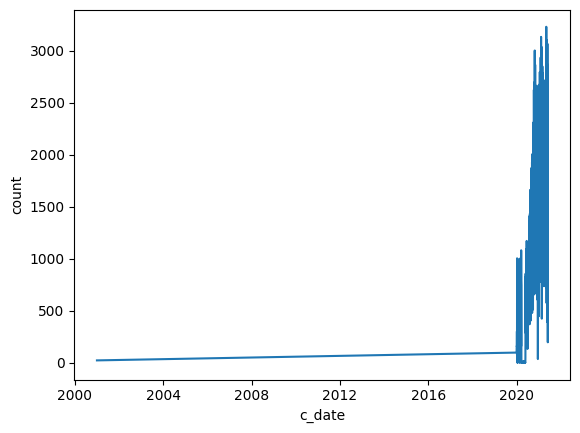

In [ ]:
# @title Timeline c_date
sns.lineplot(data=df_cdate_sorted, x='c_date', y='count')
plt.show()

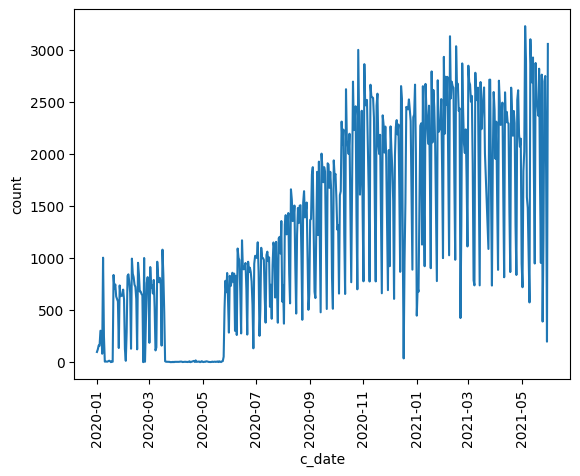

In [ ]:
# @title Timeline 2020+
sns.lineplot(data=df_cdate_sorted[df_cdate_sorted.c_date.dt.year >= 2020], x='c_date', y='count')
plt.xticks(rotation=90)
plt.show()

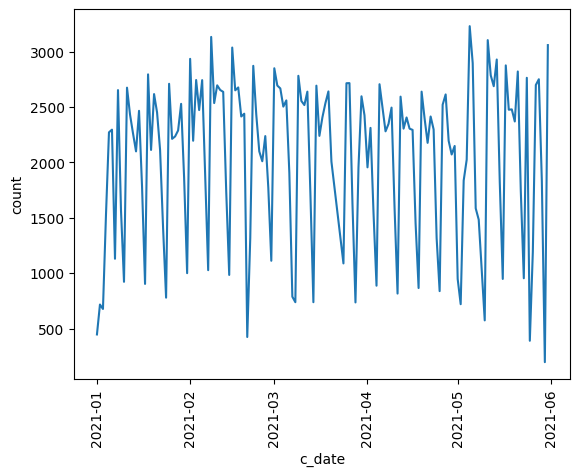

In [ ]:
# @title Timeline 2021
sns.lineplot(data=df_cdate_sorted[df_cdate_sorted.c_date.dt.year == 2021], x='c_date', y='count')
plt.xticks(rotation=90)
plt.show()

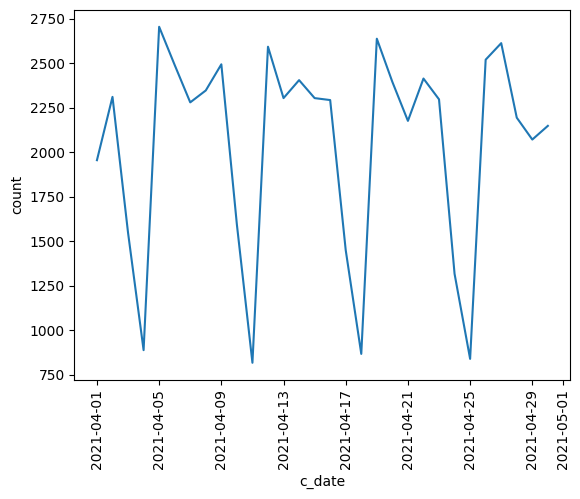

In [ ]:
# @title Timeline 2021-04
sns.lineplot(data=df_cdate_sorted[(df_cdate_sorted.c_date.dt.year == 2021) & (df_cdate_sorted.c_date.dt.month == 4)], x='c_date', y='count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_train["dd_c_date"] = df_train.c_date.dt.day
df_train["qq_c_date"] = df_train.c_date.dt.quarter
df_train["yy_c_date"] = df_train.c_date.dt.year
df_train["wd_c_date"] = df_train.c_date.dt.weekday
df_train["dy_c_date"] = df_train.c_date.dt.dayofyear
df_train["wy_c_date"] = df_train.c_date.dt.isocalendar().week
df_train["is_weekend_c_date"] = (df_train.c_date.dt.weekday > 4)
df_train.drop('c_date', axis=1, inplace=True)
dict_col[0].remove('c_date')

In [ ]:
# @title Creating features for test data
df_test["dd_c_date"] = df_test.c_date.dt.day
df_test["qq_c_date"] = df_test.c_date.dt.quarter
df_test["yy_c_date"] = df_test.c_date.dt.year
df_test["wd_c_date"] = df_test.c_date.dt.weekday
df_test["dy_c_date"] = df_test.c_date.dt.dayofyear
df_test["wy_c_date"] = df_test.c_date.dt.isocalendar().week
df_test["is_weekend_c_date"] = (df_test.c_date.dt.weekday > 4)
df_test.drop('c_date', axis=1, inplace=True)

In [ ]:
df_train[["dd_c_date","qq_c_date", "yy_c_date", "wd_c_date", "is_weekend_c_date", "dy_c_date", "wy_c_date", "target_2"]].corr()

,dd_c_date,qq_c_date,yy_c_date,wd_c_date,is_weekend_c_date,dy_c_date,wy_c_date,target_2
dd_c_date,1.000000,0.040253,-0.030372,0.027995,0.016260,0.103187,0.087330,0.000986
qq_c_date,0.040253,1.000000,-0.723298,-0.007688,0.001275,0.975282,0.963739,0.001296
yy_c_date,-0.030372,-0.723298,1.000000,0.013880,-0.000972,-0.743090,-0.741491,-0.002700
wd_c_date,0.027995,-0.007688,0.013880,1.000000,0.694263,-0.009387,-0.012275,0.002802
is_weekend_c_date,0.016260,0.001275,-0.000972,0.694263,1.000000,0.001829,0.005123,0.000981
dy_c_date,0.103187,0.975282,-0.743090,-0.009387,0.001829,1.000000,0.985458,0.001406
wy_c_date,0.087330,0.963739,-0.741491,-0.012275,0.005123,0.985458,1.000000,0.001552
target_2,0.000986,0.001296,-0.002700,0.002802,0.000981,0.001406,0.001552,1.000000


нет кореляции выше 1%

In [ ]:
df_train[dict_col[0]].describe()

,ID_NEW,Score_p,Score_bm,Score_ae,Score_vy,Score_vt,Score_r,Score_bcb,Score_ow,Score_ow_sh
count,6.477340e+05,647734.000000,647688.000000,647734.000000,647734.000000,647734.000000,647734.000000,647734.000000,6.477300e+05,647730.000000
mean,7.305177e+05,10700.242487,10.146364,3.696167,2004.384411,4.153966,12.116329,0.582529,4.256353e+09,4826.252426
std,3.273507e+05,6041.029738,3.432675,0.781283,10.014837,0.814249,6.341187,0.493142,2.623409e+09,2200.679497
min,1.652000e+03,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,1.110100e+08,1100.000000
25%,4.485425e+05,6486.000000,8.000000,4.000000,1995.000000,4.000000,9.000000,0.000000,1.952317e+09,3110.000000
50%,7.295305e+05,9265.000000,12.000000,4.000000,2005.000000,4.000000,14.000000,1.000000,4.310100e+09,4750.000000
75%,1.010671e+06,13188.000000,13.000000,4.000000,2013.000000,4.000000,19.000000,1.000000,7.111100e+09,7111.000000
max,1.334605e+06,86746.000000,53.000000,4.000000,2021.000000,11.000000,20.000000,1.000000,7.917100e+09,7917.000000


# Null values

In [ ]:
df_isna = df_train.isna().sum().reset_index().sort_values(0, ascending=False)
df_isna[df_isna[0] > 0]

,index,0
122,SCORE_11_7,544254
123,SCORE_11_8,544254
124,SCORE_11_9,544254
125,SCORE_11_10,544254
126,SCORE_11_11,544254
...,...,...
84,SCORE_8_2,8171
85,SCORE_8_3,8171
2,Score_bm,46
8,Score_ow,4


In [ ]:
dummy_variables = []
for col in df_train.columns:
  if len(df_train[str(col)].value_counts()) == 2:
    if (df_train[str(col)].value_counts().index.sort_values() == [0.0, 1.0]).all():
      dummy_variables.append(col)
print(dummy_variables)

['Score_bcb', 'target_2', 'SCORE_11_1', 'SCORE_11_2', 'SCORE_11_3', 'SCORE_11_4', 'SCORE_11_5', 'SCORE_11_6', 'SCORE_11_7', 'SCORE_11_8', 'SCORE_11_9', 'SCORE_11_10', 'SCORE_11_11', 'SCORE_11_12', 'SCORE_11_13', 'SCORE_11_14', 'SCORE_1_14', 'SCORE_11_15', 'is_weekend_c_date']


In [ ]:
for col in dummy_variables:
  if col != 'target_2':
    df_train[str(col)].fillna(0, inplace=True)
    df_test[str(col)].fillna(0, inplace=True)

In [ ]:
cat_variables = []
for col in df_train.columns:
  if (len(df_train[str(col)].value_counts()) < 100) & (col not in dummy_variables):
    values = df_train[str(col)].value_counts().index
    if sum([abs(int(val) - val) * 10 for val in values]) == 0:
      cat_variables.append(col)
print(cat_variables)

['Score_bm', 'Score_ae', 'Score_vy', 'Score_vt', 'Score_r', 'SCORE_1_1', 'SCORE_1_2', 'SCORE_1_3', 'SCORE_1_4', 'SCORE_1_5', 'SCORE_1_6', 'SCORE_1_7', 'SCORE_1_8', 'SCORE_1_9', 'SCORE_1_10', 'SCORE_2_1', 'SCORE_2_2', 'SCORE_2_3', 'SCORE_3_1', 'SCORE_3_2', 'SCORE_3_3', 'SCORE_3_4', 'SCORE_3_5', 'SCORE_3_6', 'SCORE_3_7', 'SCORE_3_8', 'SCORE_3_9', 'SCORE_3_10', 'SCORE_4_1', 'SCORE_4_2', 'SCORE_4_3', 'SCORE_4_4', 'SCORE_4_5', 'SCORE_4_6', 'SCORE_4_7', 'SCORE_4_8', 'SCORE_4_9', 'SCORE_4_10', 'SCORE_4_11', 'SCORE_4_12', 'SCORE_4_13', 'SCORE_4_14', 'SCORE_4_15', 'SCORE_4_16', 'SCORE_4_17', 'SCORE_4_18', 'SCORE_4_19', 'SCORE_4_20', 'SCORE_4_21', 'SCORE_4_22', 'SCORE_4_23', 'SCORE_4_24', 'SCORE_4_25', 'SCORE_4_26', 'SCORE_4_27', 'SCORE_4_28', 'SCORE_4_29', 'SCORE_4_30', 'SCORE_5_1', 'SCORE_5_2', 'SCORE_5_3', 'SCORE_5_4', 'SCORE_5_5', 'SCORE_5_6', 'SCORE_5_7', 'SCORE_5_8', 'SCORE_5_9', 'SCORE_5_10', 'SCORE_5_11', 'SCORE_5_12', 'SCORE_6_1', 'SCORE_6_2', 'SCORE_6_3', 'SCORE_7_1', 'SCORE_7_2', 'SCO

In [ ]:
for col in cat_variables:
  df_train[str(col)].fillna(df_train[str(col)].mode()[0], inplace=True)
  df_test[str(col)].fillna(df_test[str(col)].mode()[0], inplace=True)

In [ ]:
for col in df_test.columns:
  if col not in dummy_variables and col not in cat_variables:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_test[col].median(), inplace=True)

In [ ]:
df_isna = df_train.isna().sum().reset_index().sort_values(0, ascending=False)
df_isna[df_isna[0] > 0]

,index,0


# Model for fraud classification

In [ ]:
X = df_train.drop(['target_2', 'target_1'], axis=1).values
X_test = df_test.values
y = df_train['target_2'].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
smote =  SMOTE(random_state=42)
X_resampled, y_resampled =  smote.fit_resample(X_train, y_train)

# Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_valid)
print(classification_report(y_valid, y_pred))
# #         precision    recall  f1-score   support
# #  1.0       0.34      0.04      0.08       941

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    128606
         1.0       0.34      0.04      0.08       941

    accuracy                           0.99    129547
   macro avg       0.67      0.52      0.54    129547
weighted avg       0.99      0.99      0.99    129547



In [ ]:
print(confusion_matrix(y_valid, y_pred))
# [[128529     77]
#  [   901     40]]


[[128529     77]
 [   901     40]]


# Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)
print(classification_report(y_valid, y_pred))
# accuracy of fraud = 0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    128606
         1.0       0.00      0.00      0.00       941

    accuracy                           0.99    129547
   macro avg       0.50      0.50      0.50    129547
weighted avg       0.99      0.99      0.99    129547



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_valid, y_pred))

[[128606      0]
 [   941      0]]


# LightGBM

In [ ]:
# !pip install lightgbm --install-option=--gpu

In [ ]:
# check lightgbm version
import lightgbm
print(lightgbm.__version__)

4.1.0


In [ ]:
# param_distributions = {'max_depth': [3],
#                         'eval_metric':['auc'],
#               # 'lambda_l1': [10.0],
#                #'application': ['binary'],
#               #'num_leaves': [182, 178, 180]
#                        }
# modl = LGBMClassifier()
# cv = RandomizedSearchCV(modl, param_distributions=param_distributions, scoring='roc_auc')
# cv.fit(X_train, y_train)
# print(cv.best_estimator_, cv.best_score_)


In [ ]:
clf = LGBMClassifier(num_iterations=1000)
clf.fit(X_train, y_train,eval_set = (X_valid, y_valid))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 3754, number of negative: 514433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3339
[LightGBM] [Info] Number of data points in the train set: 518187, number of used features: 186
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007244 -> initscore=-4.920243
[LightGBM] [Info] Start training from score -4.920243


LGBMClassifier(num_iterations=1000)

In [ ]:
print('train roc accuracy',roc_auc_score(y_train, clf.predict(X_train)))

y_valid_pred = clf.predict(X_valid)
print('validation roc accuracy', roc_auc_score(y_valid, y_valid_pred))
# train roc accuracy 0.8545522253511335
# validation roc accuracy 0.5119333410269391

train roc accuracy 0.8493577661076599
validation roc accuracy 0.5092765928866627


In [ ]:
print(confusion_matrix(y_valid, y_valid_pred))

[[128532     74]
 [   923     18]]


# XGboost

In [ ]:
import xgboost as xgb

In [ ]:
clfx = xgb.XGBClassifier(
        n_estimators=500,
        max_depth=9,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        missing=-999,
        random_state=2019,
        tree_method='auto',
        n_jobs = -1,

    )

In [ ]:
clfx.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=-999, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, random_state=2019, ...)

In [ ]:
print('train roc accuracy',roc_auc_score(y_train, clfx.predict(X_train)))

y_valid_pred = clfx.predict(X_valid)
print('validation roc accuracy', roc_auc_score(y_valid, y_valid_pred))
# train roc accuracy 0.7743720571777934
# validation roc accuracy 0.5110805853193411

train roc accuracy 0.7381440337361314
validation roc accuracy 0.5105686749087407


In [ ]:
print(confusion_matrix(y_valid, y_valid_pred))
# [[128586     20]
#  [   920     21]]

[[128591     15]
 [   921     20]]


# Random Forest для задачи классификации выявил наибольшее количество fraud и имеет наилучший показатель f1score. Ниже используем данную модель для тестовых данных.

In [ ]:
y_pred_test = rfc.predict(X_test)
y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

# Model for prediction sum of penalty within fraud detection

In [ ]:
X = df_train.drop(['target_2', 'target_1'], axis=1).values
X_test = df_test.values
y = df_train['target_1'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Linear Regression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_valid)
print(mean_squared_error(y_valid, y_pred, squared=False))

110965.23088174843


# Ridge

In [ ]:
alpha = [0.1, 1.0, 10.0, 100.0, 1000.0]
for alpha in alpha:
  r = Ridge(alpha=alpha)
  r.fit(X_train, y_train)
  y_pred = r.predict(X_valid)
  print(alpha, mean_squared_error(y_valid, y_pred, squared=False))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08147e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.1 110965.23070449608


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07696e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.0 110965.22938877785


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.00149e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


10.0 110965.21637139273


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.73119e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


100.0 110965.09736129582


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.40453e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1000.0 110964.31192989272


# Lasso

In [ ]:
alpha = [0.1, 1.0, 10.0, 20.0, 50.0]
for alpha in alpha:
  l = Lasso(alpha=alpha)
  l.fit(X_train, y_train)
  y_pred = l.predict(X_valid)
  print(alpha, mean_squared_error(y_valid, y_pred, squared=False))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.619e+15, tolerance: 1.325e+12
  model = cd_fast.enet_coordinate_descent(


0.1 110964.91049792769


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.619e+15, tolerance: 1.325e+12
  model = cd_fast.enet_coordinate_descent(


1.0 110964.18579960172


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.619e+15, tolerance: 1.325e+12
  model = cd_fast.enet_coordinate_descent(


10.0 110960.90899776852


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.616e+15, tolerance: 1.325e+12
  model = cd_fast.enet_coordinate_descent(


20.0 110959.15847223322


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.993e+15, tolerance: 1.325e+12
  model = cd_fast.enet_coordinate_descent(


50.0 110955.21900197124


# Выбор модели с наименьшим RMSE - Lasso(alpha=50)

In [ ]:
l = Lasso(alpha=50)
l.fit(X_train, y_train)
y_pred_test = l.predict(X_test)
y_pred_test

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.993e+15, tolerance: 1.325e+12
  model = cd_fast.enet_coordinate_descent(


array([ 4827.34748959, 13310.24861024,  9775.62364726, ...,
        6674.09967854, 11683.24537585,  9109.32294342])